In [23]:
%pip install transformers
%pip install pillow
%pip install git+https://github.com/openai/CLIP.git


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/openai/CLIP.git to c:\users\marce\appdata\local\temp\pip-req-build-yv4op_um
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 31.4 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369633 sha256=ef2c96c8078d5718a88dc0769a49b071fd8251a81c77015f0c2e090f33e63917
  Stored in directory: C:\Users\marce\AppData\Local\Temp\pip-ephem-wheel-cache-c8rgp_6w\wheels\35\

  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git 'C:\Users\marce\AppData\Local\Temp\pip-req-build-yv4op_um'

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModel
from PIL import Image
from tqdm import tqdm
import pandas as pd
import clip

In [25]:
# === Modelos carregados ===
device = "cuda" if torch.cuda.is_available() else "cpu"
bert_model = AutoModel.from_pretrained("neuralmind/bert-base-portuguese-cased").to(device)
tokenizer_bert = AutoTokenizer.from_pretrained("neuralmind/bert-base-portuguese-cased")
clip_model, clip_preprocess = clip.load("ViT-B/32", device=device)

bert_model.eval()
clip_model.eval()

100%|███████████████████████████████████████| 338M/338M [01:49<00:00, 3.24MiB/s]


CLIP(
  (visual): VisionTransformer(
    (conv1): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32), bias=False)
    (ln_pre): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (transformer): Transformer(
      (resblocks): Sequential(
        (0): ResidualAttentionBlock(
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          )
          (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): Sequential(
            (c_fc): Linear(in_features=768, out_features=3072, bias=True)
            (gelu): QuickGELU()
            (c_proj): Linear(in_features=3072, out_features=768, bias=True)
          )
          (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
        (1): ResidualAttentionBlock(
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          

In [42]:
df= pd.read_csv("HateBR.csv")

In [46]:
link = "https://www.instagram.com/p/B2uThqdH9xI/"

In [48]:
link.split("/")[-2]

'B2uThqdH9xI'

In [49]:
df["post_id"] = df["links_post"].apply(lambda x:x.split("/")[-2])

In [50]:
df

id                                         comentario  anotator1  \
0        1                                       Mais um lixo          1   
1        2                    Essa nao tem vergonha na cara!!          1   
2        3                     Essa mulher é doente.pilantra!          1   
3        4                                Comunista safada...          1   
4        5  Vagabunda. Comunista. Mentirosa. O povo chilen...          1   
...    ...                                                ...        ...   
6995  6996  Parabéns Eduardo!!! Deus te proteja. Obrigada ...          0   
6996  6997  A melhor maneira de unir a direita do mundo to...          0   
6997  6998               Vcs são lutadores. Sejam protegidos.          0   
6998  6999  Parabéns Deus abençoe 🙌, que a verdade traga a...          0   
6999  7000  Agradecer a Deus por colocar esses anjos para ...          0   

      anotator2  anotator3  label_final  \
0             1          1            1   
1             1          1            1   
2             1          1            1   
3             1          1            1   
4             1          1            1   
...         ...        ...          ...   
6995          0          0            0   
6996          0          0            0   
6997          0          0            0   
6998          0          0            0   
6999          0          0            0   

                                    links_post       account_post      post_id  
0     https://www.instagram.com/p/B2uThqdH9xI/     Carla Zambelli  B2uThqdH9xI  
1     https://www.instagram.com/p/B2uThqdH9xI/     Carla Zambelli  B2uThqdH9xI  
2     https://www.instagram.com/p/B2uThqdH9xI/     Carla Zambelli  B2uThqdH9xI  
3     https://www.instagram.com/p/B2uThqdH9xI/     Carla Zambelli  B2uThqdH9xI  
4     https://www.instagram.com/p/B2uThqdH9xI/     Carla Zambelli  B2uThqdH9xI  
...                                        ...                ...          ...  
6995  https://www.instagram.com/p/C5rDlbTPTJq/  Eduardo Bolsonaro  C5rDlbTPTJq  
6996  https://www.instagram.com/p/C5rDlbTPTJq/  Eduardo Bolsonaro  C5rDlbTPTJq  
6997  https://www.instagram.com/p/C5rDlbTPTJq/  Eduardo Bolsonaro  C5rDlbTPTJq  
6998  https://www.instagram.com/p/C5rDlbTPTJq/  Eduardo Bolsonaro  C5rDlbTPTJq  
6999  https://www.instagram.com/p/C5rDlbTPTJq/  Eduardo Bolsonaro  C5rDlbTPTJq  

[7000 rows x 9 columns]

In [54]:
import os
base_path = 'downloaded_instagram_posts'

def get_imagepath(id):
    folder_path = os.path.join(base_path, str(id))
    if os.path.isdir(folder_path):
        arquivos = os.listdir(folder_path)
        for arq in arquivos:
            # Verifica se é uma imagem comum (pode expandir se quiser)
            if arq.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                return os.path.join(folder_path, arq)
    return None  # Retorna None se não encontrar imagem

In [57]:
df['path_local'] = df['post_id'].apply(get_imagepath)

In [58]:
df

id                                         comentario  anotator1  \
0        1                                       Mais um lixo          1   
1        2                    Essa nao tem vergonha na cara!!          1   
2        3                     Essa mulher é doente.pilantra!          1   
3        4                                Comunista safada...          1   
4        5  Vagabunda. Comunista. Mentirosa. O povo chilen...          1   
...    ...                                                ...        ...   
6995  6996  Parabéns Eduardo!!! Deus te proteja. Obrigada ...          0   
6996  6997  A melhor maneira de unir a direita do mundo to...          0   
6997  6998               Vcs são lutadores. Sejam protegidos.          0   
6998  6999  Parabéns Deus abençoe 🙌, que a verdade traga a...          0   
6999  7000  Agradecer a Deus por colocar esses anjos para ...          0   

      anotator2  anotator3  label_final  \
0             1          1            1   
1             1          1            1   
2             1          1            1   
3             1          1            1   
4             1          1            1   
...         ...        ...          ...   
6995          0          0            0   
6996          0          0            0   
6997          0          0            0   
6998          0          0            0   
6999          0          0            0   

                                    links_post       account_post  \
0     https://www.instagram.com/p/B2uThqdH9xI/     Carla Zambelli   
1     https://www.instagram.com/p/B2uThqdH9xI/     Carla Zambelli   
2     https://www.instagram.com/p/B2uThqdH9xI/     Carla Zambelli   
3     https://www.instagram.com/p/B2uThqdH9xI/     Carla Zambelli   
4     https://www.instagram.com/p/B2uThqdH9xI/     Carla Zambelli   
...                                        ...                ...   
6995  https://www.instagram.com/p/C5rDlbTPTJq/  Eduardo Bolsonaro   
6996  https://www.instagram.com/p/C5rDlbTPTJq/  Eduardo Bolsonaro   
6997  https://www.instagram.com/p/C5rDlbTPTJq/  Eduardo Bolsonaro   
6998  https://www.instagram.com/p/C5rDlbTPTJq/  Eduardo Bolsonaro   
6999  https://www.instagram.com/p/C5rDlbTPTJq/  Eduardo Bolsonaro   

          post_id                                         path_local  
0     B2uThqdH9xI                                               None  
1     B2uThqdH9xI                                               None  
2     B2uThqdH9xI                                               None  
3     B2uThqdH9xI                                               None  
4     B2uThqdH9xI                                               None  
...           ...                                                ...  
6995  C5rDlbTPTJq  downloaded_instagram_posts\C5rDlbTPTJq\2024-04...  
6996  C5rDlbTPTJq  downloaded_instagram_posts\C5rDlbTPTJq\2024-04...  
6997  C5rDlbTPTJq  downloaded_instagram_posts\C5rDlbTPTJq\2024-04...  
6998  C5rDlbTPTJq  downloaded_instagram_posts\C5rDlbTPTJq\2024-04...  
6999  C5rDlbTPTJq  downloaded_instagram_posts\C5rDlbTPTJq\2024-04...  

[7000 rows x 10 columns]

In [60]:
img1 = df.iloc[6999].path_local

In [61]:
img1

'downloaded_instagram_posts\\C5rDlbTPTJq\\2024-04-12_19-29-24_UTC.jpg'

In [62]:
from PIL import Image

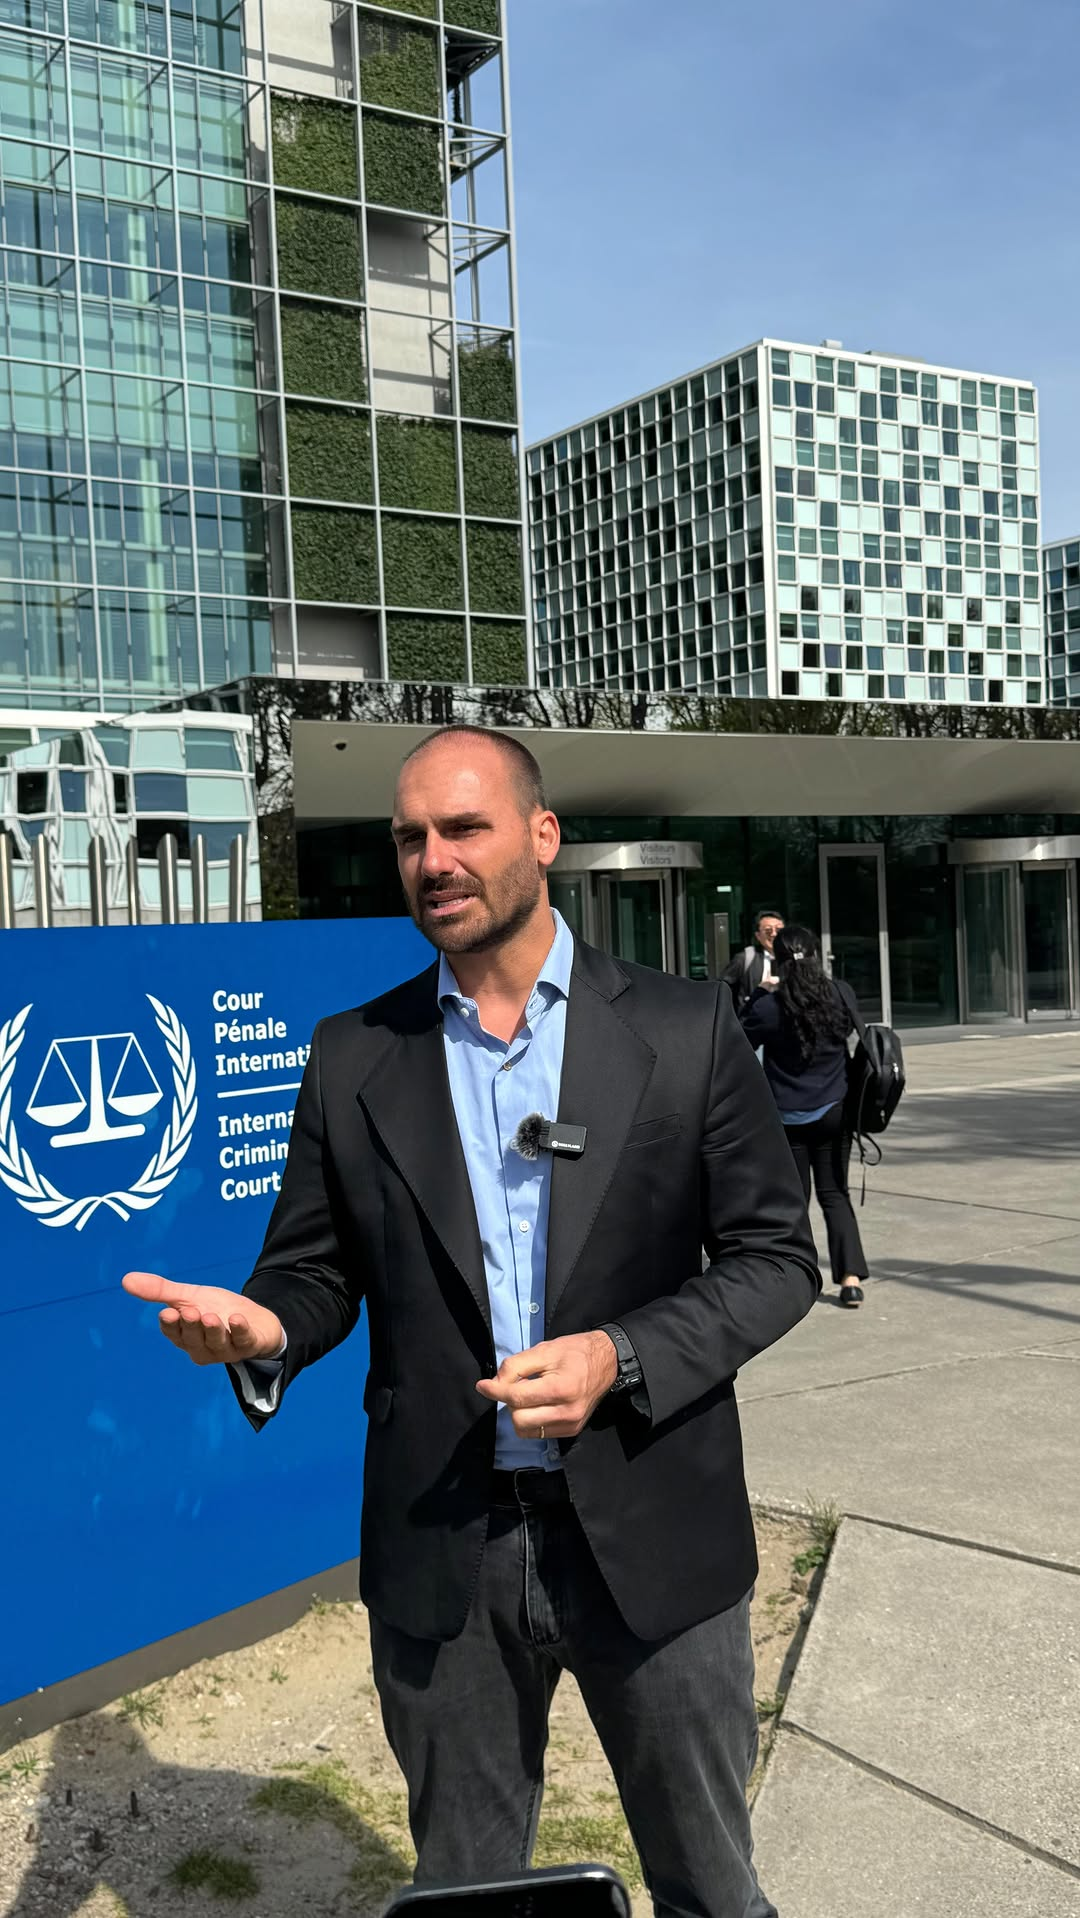

In [63]:
Image.open(img1)

In [64]:
class MultimodalDataset(Dataset):
    def __init__(self, dataframe):
        self.textos = dataframe['comentario'].tolist()
        self.imagem_paths = dataframe['path_local'].tolist()
        self.labels = dataframe['label_final'].tolist()
    
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        # Texto
        inputs = tokenizer_bert(self.textos[idx], return_tensors="pt", truncation=True, padding=True, max_length=128)
        inputs = {k: v.to(device) for k, v in inputs.items()}
        with torch.no_grad():
            saida_bert = bert_model(**inputs)
            texto_vec = saida_bert.last_hidden_state[:, 0, :].squeeze()  # [768]

        # Imagem
        try:
            image = Image.open(self.imagem_paths[idx]).convert("RGB")
            image_tensor = clip_preprocess(image).unsqueeze(0).to(device)
            with torch.no_grad():
                imagem_vec = clip_model.encode_image(image_tensor).squeeze()  # [512]
        except:
            imagem_vec = torch.zeros(512).to(device)

        # Combinar
        multimodal_vec = torch.cat([texto_vec, imagem_vec])  # [1280]
        label = torch.tensor(self.labels[idx], dtype=torch.float)
        return multimodal_vec, label

In [66]:
# Treino/Teste
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2)

train_data = MultimodalDataset(df_train)
test_data = MultimodalDataset(df_test)

train_loader = DataLoader(train_data, batch_size=8, shuffle=True)
test_loader = DataLoader(test_data, batch_size=8)

In [ ]:
# === Classificador multimodal ===
class MultimodalClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Linear(1280, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.fc(x)

modelo_multimodal = MultimodalClassifier().to(device)
optimizer = torch.optim.Adam(modelo_multimodal.parameters(), lr=1e-4)
loss_fn = nn.BCELoss()


In [ ]:
# === Treinamento ===
for epoch in range(5):
    modelo_multimodal.train()
    total_loss = 0
    for X, y in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
        X, y = X.to(device).float(), y.to(device).float().unsqueeze(1)
        y_pred = modelo_multimodal(X)
        loss = loss_fn(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1} | Loss: {total_loss / len(train_loader):.4f}")

Epoch 1: 100%|██████████| 700/700 [13:45<00:00,  1.18s/it]

Epoch 1 | Loss: 0.3977


In [69]:
# === Avaliação ===

modelo_multimodal.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for X, y in test_loader:
        X = X.to(device).float()
        preds = modelo_multimodal(X).cpu().numpy()
        y_pred.extend((preds > 0.5).astype(int).flatten().tolist())
        y_true.extend(y.numpy().tolist())

In [70]:
from sklearn.metrics import classification_report
print("\n=== Avaliação Final Multimodal ===")
print(classification_report(y_true, y_pred, digits=3))


=== Avaliação Final Multimodal ===
              precision    recall  f1-score   support

         0.0      0.871     0.890     0.881       693
         1.0      0.890     0.871     0.881       707

    accuracy                          0.881      1400
   macro avg      0.881     0.881     0.881      1400
weighted avg      0.881     0.881     0.881      1400



In [78]:
from PIL import Image

# === Input manual ===
caminho_imagem = "imageteletubies.png"  # Substitua aqui
comentario = "Horrivel"

# === Pré-processamento texto ===
inputs = tokenizer_bert(comentario, return_tensors="pt", truncation=True, padding=True, max_length=128)
inputs = {k: v.to(device) for k, v in inputs.items()}
with torch.no_grad():
    saida_bert = bert_model(**inputs)
    texto_vec = saida_bert.last_hidden_state[:, 0, :].squeeze()  # [768]

# === Pré-processamento imagem ===
try:
    image = Image.open(caminho_imagem).convert("RGB")
    image_tensor = clip_preprocess(image).unsqueeze(0).to(device)
    with torch.no_grad():
        imagem_vec = clip_model.encode_image(image_tensor).squeeze()  # [512]
except:
    imagem_vec = torch.zeros(512).to(device)

# === Inferência ===
multimodal_vec = torch.cat([texto_vec, imagem_vec]).unsqueeze(0).float().to(device)
modelo_multimodal.eval()
with torch.no_grad():
    prob = modelo_multimodal(multimodal_vec).item()
    pred = int(prob > 0.5)

# === Resultado ===
print(f"Probabilidade de discurso de ódio: {prob:.4f}")
print("Classificação:", "Discurso de ódio" if pred == 1 else "Comentário normal")


Probabilidade de discurso de ódio: 0.6795
Classificação: Discurso de ódio
